## Logistic Regression

#### Import all Libraries needed for the model 

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.api as sm
import pylab as pl

Import the Open Food Dataset . First import only 10000 records . 

In [2]:
pd_1 = pd.read_csv('en.openfoodfacts.org.products.csv', sep='\t',nrows = 10000 )
pd_1.head()

/Users/vingadgil/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000024600,http://world-en.openfoodfacts.org/product/0000...,date-limite-app,1434530704,2015-06-17T08:45:04Z,1434535914,2015-06-17T10:11:54Z,Filet de bœuf,NaN,2.46 kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000027205,http://world-en.openfoodfacts.org/product/0000...,tacinte,1458238630,2016-03-17T18:17:10Z,1458238638,2016-03-17T18:17:18Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000036252,http://world-en.openfoodfacts.org/product/0000...,tacinte,1422221701,2015-01-25T21:35:01Z,1422221855,2015-01-25T21:37:35Z,Lion Peanut x2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000039259,http://world-en.openfoodfacts.org/product/0000...,tacinte,1422221773,2015-01-25T21:36:13Z,1422221926,2015-01-25T21:38:46Z,Twix x2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000039529,http://world-en.openfoodfacts.org/product/0000...,teolemon,1420147051,2015-01-01T21:17:31Z,1439141740,2015-08-09T17:35:40Z,Pack de 2 Twix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
pd_null = pd_1[pd_1.product_name.isnull()]
pd_null[['code','product_name','ingredients_text']].head()

,code,product_name,ingredients_text
1,0000000027205,NaN,NaN
10,0000007020254,NaN,NaN
23,0000069105241,NaN,NaN
28,0000140000083,NaN,NaN
29,00002523,NaN,NaN


In [4]:
len(pd_1[pd_1.ingredients_text.isnull()])


5546

In [5]:
pd_1[pd_1.ingredients_text.isnull()][['code','ingredients_text']].head()

,code,ingredients_text
0,0000000024600,NaN
1,0000000027205,NaN
2,0000000036252,NaN
3,0000000039259,NaN
4,0000000039529,NaN


In [6]:
len(pd_1)

10000

Select only records from data which actually have ingredients i.e. ingredients_text has some values. We shall only be considering such records.

In [7]:
pd_1 = pd_1[pd_1.ingredients_text.notnull()]
len(pd_1)

4454

Out of 10000 records there are only 4454 records which has ingredients.

In [8]:
# get col names
col_names = pd_1.columns.values.tolist()
col_names

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'allergens_en',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

Selecting only specific columns from the dataset which is required for the logisitic regresssion - Code, Product name,
Ingredients, Additives in the dataset and number of additives in each item.

In [8]:
pd_new = pd_1[['code' , 'product_name' , 'ingredients_text', 'additives','additives_n']]
pd_new = pd_new[pd_new.ingredients_text.notnull()]
pd_new.head()

,code,product_name,ingredients_text,additives,additives_n
5,0000000056434,diet lemonade by Sainsbury's,"carbonated water, acid: citric acid; flavouri...",[ carbonated-water -> en:carbonated-water ] ...,4.0
6,0000001071894,Flute,Wheat,[ wheat -> en:wheat ],0.0
7,0000001471762,still Scottish water,water,[ water -> en:water ],0.0
8,0000001798180,Fairtrade Ground Cinnamon,cinnamon,[ cinnamon -> en:cinnamon ],0.0
9,0000005200016,lentilles vertes,lentilles vertes,[ lentilles-vertes -> fr:lentilles-vertes ] ...,0.0


#### Calculate Top 50 Ingredients from the Ingredients_text

In [9]:
# Calculate top 50 Ingredients -

# get counts by ingredient
# taken from http://stackoverflow.com/questions/12680754/split-pandas-dataframe-string-entry-to-separate-rows
df_ingredients_tmp = pd_new[['code' , 'ingredients_text']]


Split all the ingredients_text by comma ','

In [11]:
df_ingredients = df_ingredients_tmp.ingredients_text.str.split(',').tolist()
df_tmp = pd.DataFrame(df_ingredients,index=df_ingredients_tmp.code).stack() 
df_tmp = df_tmp.reset_index()[[0, 'code']] # var1 variable is currently labeled 0
df_tmp.columns = ['ingredients_text', 'code'] # renaming var1
df_tmp.head()

,ingredients_text,code
0,carbonated water,0000000056434
1,acid: citric acid; flavourings,0000000056434
2,acidity regular: trisodium citrate; sweetener...,0000000056434
3,Wheat,0000001071894
4,water,0000001471762


In [12]:
# Get the count for each ingredients.
df1 = df_tmp['ingredients_text'].str.upper().value_counts()
df1.index

Index([' SEL', ' SALT', ' SUCRE', ' SUGAR', ' EAU', ' WATER', ' DEXTROSE',
       ' NIACIN', ' CITRIC ACID', ' SIROP DE GLUCOSE',
       ...
       '  UNSALTED BUTTER (MILK) (12%)',
       ' FESTIGUNGSMITTEL: CALCIUMCHLORID; SÄUERUNGSMITTEL: CITRONENSÄURE',
       ' JUS DE CAROTTE À BASE DE CONCENTRÉ 8%', 'ACIDIFIANT E330',
       ' ARÔME BERGAMOTE 3%', ' ARÔME ARTIFICIEL DE CREVETTES',
       ' DICED TOMATOES', '_EGGS_', ' MALTODEXTRIN CARAMELIZED SUGAR SYRUP',
       ' YEAST NUTRIENTS'],
      dtype='object', length=17793)

In [13]:
df_tmp['ingredients_text'] = df_tmp['ingredients_text'].str.upper()

In [17]:
#df1.dtypes

In [14]:
# group by each ingredient and count unique number of products ('code')
df_ingredients_ranks = pd.DataFrame(df_tmp.groupby('ingredients_text').code.nunique())
# rename col
df_ingredients_ranks.columns = ['num_products'] # renaming
# sort it
df_ingredients_ranks = df_ingredients_ranks.sort(['num_products'], ascending=[False])
# here is the top 50 ingredients
df_ingredients_top50 = df_ingredients_ranks.head(50)
df_ingredients_top50

/Users/vingadgil/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,num_products
ingredients_text,
SEL,701
SALT,658
SUCRE,590
SUGAR,462
EAU,429
WATER,280
DEXTROSE,264
NIACIN,183
CITRIC ACID,169


In [19]:
#df_ingredients_ranks.to_csv('50ingredients.csv')

['num_products']

In [15]:
pd_new = pd_new[['code' , 'product_name' , 'ingredients_text' ,'additives_n','additives']]
pd_new = pd_new[pd_new.ingredients_text.notnull()]
pd_new.head()

,code,product_name,ingredients_text,additives_n,additives
5,0000000056434,diet lemonade by Sainsbury's,"carbonated water, acid: citric acid; flavouri...",4.0,[ carbonated-water -> en:carbonated-water ] ...
6,0000001071894,Flute,Wheat,0.0,[ wheat -> en:wheat ]
7,0000001471762,still Scottish water,water,0.0,[ water -> en:water ]
8,0000001798180,Fairtrade Ground Cinnamon,cinnamon,0.0,[ cinnamon -> en:cinnamon ]
9,0000005200016,lentilles vertes,lentilles vertes,0.0,[ lentilles-vertes -> fr:lentilles-vertes ] ...


### Creating the Logistic Regression Model 

Plotting Additives_N field. In order to plot the additives , we have ignored all entries which are 0. Just plotting values which are above 0.

In [16]:
pd_additive = pd_new[pd_new.additives_n > 0]

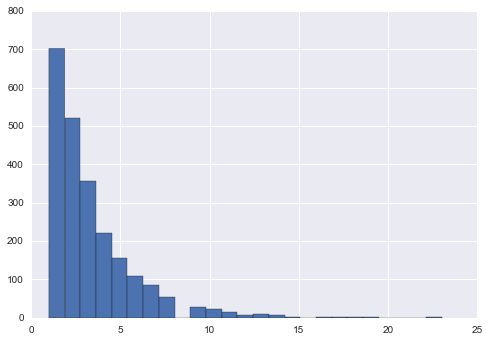

In [17]:
pd_additive.additives_n.hist(bins=25)

Since We would be using Additives_n column for Regression model we shall create a new column called'High Add' .


If Additives_n > 4 ,
     
   High Add = 1.
 
Else 

   High Add = 0.

In [18]:
pd_new['high_add'] = np.where(pd_new['additives_n']>4, '1', '0')

In [19]:
len(pd_new[pd_new['high_add'] == '1'])

505

Around 505 items amont 4000 records have more than 4 additives in ingredients.

##### Based on the Top 50 ingredients and checking the Top 20 Additives on Web , we create new dummy variables.
TOP 20 Additives that we search in the Ingredients are -

1. SALT
2. SUGAR
3. CHOCO / CHOCOLATE
4. DEXTROSE
5. CITRIC ACID
6. AROME
7. COCOA BUTTER
8. GLUCOSE
9. CORN SYRUP
10. WHEAT
11. CARBONATED WATER
12. PALM OIL
13. MONOSODIUM GLUTAMATE
14. YEAST
15. HYDROGENATED OIL
16. ARTIFICIAL COLORS
17. SODIUM NITRATE / SODIUM NITRITE
18. BHA
19. BHT
20. STARCH
21. ARTIFICAL SWEETNERS- Saccharin,Aspartame,Sucralose,Agave nectar,Bleached starch


Create new Columns to check if ingredients have additives. For each Additive we add another column if ingredients 
have that material

In [21]:
pd_new['ingredients_text'] = pd_new['ingredients_text'].str.upper()

In [29]:
def new_coumn(column_name,label):
    
    pattern = '|'.join(label)
    
    pd_new[column_name] = pd_new['ingredients_text'].str.contains(pattern)
    pd_new.column_name = pd_new.column_name.astype(int)
    
    return pd_new[column_name]

In [22]:
# Check if Ingredients have Wheat .

#pd_new['has_wheat'] = pd_new['ingredients_text'].str.match('Wheat|wheat',case = '1', na='0')

wheat = ['Wheat','wheat','Weizen','blé','trigo','WHEAT']

pattern = '|'.join(wheat)


pd_new['has_wheat'] = pd_new['ingredients_text'].str.contains(pattern)
pd_new.has_wheat = pd_new.has_wheat.astype(int)


In [23]:
# Check if Ingredients has Salt.

#pd_new['has_salt'] = pd_new['ingredients_text'].str.match('Salt|salt|SALT|SEL|SALZ',case = '1', na='0')

salt = ['Salt','SALT','SAL','SALZ','SEL']

pattern = '|'.join(salt)
pd_new['has_salt'] = pd_new['ingredients_text'].str.contains(pattern) 
pd_new.has_salt = pd_new.has_salt.astype(int)

In [24]:
# Check if Ingredients has Sugar

sugar = ['SUGAR','SUCRE','AZÚCAR','ZUCKER','Sugar']
sugar = '|'.join(sugar)

pd_new['has_sugar'] = pd_new['ingredients_text'].str.contains(sugar)
pd_new.has_sugar = pd_new.has_sugar.astype(int)



In [25]:
# Check if Ingredients has Chocolate .

chocolate = ['CHOCO','CHOCOLATE','CHOCOLAT','SCHOKOLADE','Chocolate']

chocolate = '|'.join(chocolate)

pd_new['has_choco'] = pd_new['ingredients_text'].str.contains(chocolate)
pd_new.has_choco = pd_new.has_choco.astype(int)

In [26]:
# Check if Ingredients has Milk

milk = ['MILK','LECHE','MILCHE','LAIT','Milk']
milk = '|'.join(milk)

pd_new['has_milk'] = pd_new['ingredients_text'].str.contains(milk)
pd_new.has_milk = pd_new.has_milk.astype(int)


In [27]:
# Check if Ingredients has Color

color = ['Color','COLOR','FARBE','COULEUR']
color = '|'.join(color)

pd_new['has_color'] = pd_new['ingredients_text'].str.contains(color)
pd_new.has_color = pd_new.has_color.astype(int)


In [30]:
# Check if Ingredients has Sodium Nitrate , Sodium Nitrite
sodium = ['Sodium Nitrate','SODIUM NITRATE','Sodium Nitrite','SODIUM NITRITE']
sodium = '|'.join(sodium)

pd_new['has_sodium'] = pd_new['ingredients_text'].str.contains(sodium)
pd_new.has_sodium = pd_new.has_sodium.astype(int)


In [31]:
# Check if Ingredients has Corn Syrup

corn_syrup = ['Corn Syrup','CORN SYRUP','MAISSIRUP','SIROP DE MAÏS','JARABE DE MAÍZ']
corn_syrup = '|'.join(corn_syrup)

pd_new['has_corn_syrup'] = pd_new['ingredients_text'].str.contains(corn_syrup)
pd_new.has_corn_syrup = pd_new.has_corn_syrup.astype(int)



In [32]:
# Check if Ingredients has BHA

bha = ['Bha','BHA']
bha = '|'.join(bha)

pd_new['has_bha'] = pd_new['ingredients_text'].str.contains(bha)
pd_new.has_bha = pd_new.has_bha.astype(int)

In [33]:
# Check if Ingredients has BHT

bht = ['Bht','BHT']
bht = '|'.join(bht)

pd_new['has_bht'] = pd_new['ingredients_text'].str.contains(bht)
pd_new.has_bht = pd_new.has_bht.astype(int)

In [34]:
# Check if Ingredients has MSG

msg = ['MSG','Msg','MONOSODIUM GLUTAMATE']
msg = '|'.join(msg)

pd_new['has_msg'] = pd_new['ingredients_text'].str.contains(msg)
pd_new.has_msg = pd_new.has_msg.astype(int)

In [35]:
# Check if Ingredients has YEAST

yeast = ['Yeast','YEAST','LEVURE','HEFE','LEVADURA']
yeast = '|'.join(yeast)

pd_new['has_yeast'] = pd_new['ingredients_text'].str.contains(yeast)
pd_new.has_yeast = pd_new.has_yeast.astype(int)
    

In [36]:
# Check if Ingredients has Carbonated Water

carbon = ['Carbonated Water','CARBONATED WATER','EAU GAZEUSE','AGUA CARBONATADA','WASSER MIT KOHLENSÄURE']
carbon = '|'.join(carbon)

pd_new['has_carbon'] = pd_new['ingredients_text'].str.contains(carbon)
pd_new.has_carbon = pd_new.has_carbon.astype(int)

In [28]:
# Check if Ingredients has Palm Oil

palm = ['Palm Oil','PALM OIL','PALMÖL','HUILE DE PALME','ACEITE DE PALMA']
palm = '|'.join(palm)

pd_new['has_palm'] = pd_new['ingredients_text'].str.contains(palm)
pd_new.has_palm = pd_new.has_palm.astype(int)


In [38]:
# Check if Ingredients has Hydrogenated Oil

hyr_oil = ['Hydrogenated','HYDROGENATED','HIDROGENADO','HYDROGENIERT','HYDROGÉNÉ']
hyr_oil = '|'.join(hyr_oil)

pd_new['has_hyr_oil'] = pd_new['ingredients_text'].str.contains(hyr_oil)
pd_new.has_hyr_oil = pd_new.has_hyr_oil.astype(int)


In [39]:
# Check if Ingredients has Artificial Sweetners

art_sweet = ['SACCHARIN','ASPARTAME','SUCRALOSE','AGAVE NECTAR']
art_sweet = '|'.join(art_sweet)

pd_new['has_art_sweet'] = pd_new['ingredients_text'].str.contains(palm)
pd_new.has_art_sweet = pd_new.has_art_sweet.astype(int)

In [40]:
# Check if Ingredients has DEXTROSE

dextrose = ['Dextrose','DEXTROSE']
dextrose = '|'.join(dextrose)

pd_new['has_dextrose'] = pd_new['ingredients_text'].str.contains(dextrose)
pd_new.has_dextrose = pd_new.has_dextrose.astype(int)

In [41]:
# Check if Ingredients has GLUCOSE

glucose = ['Glucose','GLUCOSE']
glucose = '|'.join(glucose)

pd_new['has_glucose'] = pd_new['ingredients_text'].str.contains(dextrose)
pd_new.has_glucose = pd_new.has_glucose.astype(int)

In [29]:
# Check if Ingredients has cocoa butter

cocoa = ['Cocoa Butter','COCOA BUTTER','COCOA','KAKAOBUTTER','LE BEURRE DE CACAO','CACAO','KAKAO']
cocoa = '|'.join(cocoa)

pd_new['has_cocoa'] = pd_new['ingredients_text'].str.contains(cocoa)
pd_new.has_cocoa = pd_new.has_cocoa.astype(int)

In [30]:
# manually add the intercept
pd_new['intercept'] = 1.0

In [31]:
pd_new['high_add'] = pd_new['high_add'].astype(int)

In [32]:
#pd_new.to_csv('abcd.csv')
pd_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4454 entries, 5 to 9999
Data columns (total 15 columns):
code                4454 non-null object
product_name        4417 non-null object
ingredients_text    4454 non-null object
additives_n         4452 non-null float64
additives           3987 non-null object
high_add            4454 non-null int64
has_wheat           4454 non-null int64
has_salt            4454 non-null int64
has_sugar           4454 non-null int64
has_choco           4454 non-null int64
has_milk            4454 non-null int64
has_color           4454 non-null int64
has_palm            4454 non-null int64
has_cocoa           4454 non-null int64
intercept           4454 non-null float64
dtypes: float64(2), int64(9), object(4)
memory usage: 556.8+ KB


LOGISTIC REGRESSION MODEL

In [33]:
train_cols = [ 'has_wheat' , 'has_salt' , 'has_sugar', 'has_choco' ,'has_milk','has_cocoa','has_palm','intercept']


logit = sm.Logit(pd_new['high_add'], pd_new[train_cols])

# fit the model
result = logit.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.306835
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               high_add   No. Observations:                 4454
Model:                          Logit   Df Residuals:                     4446
Method:                           MLE   Df Model:                            7
Date:                Mon, 28 Nov 2016   Pseudo R-squ.:                  0.1321
Time:                        16:21:12   Log-Likelihood:                -1366.6
converged:                       True   LL-Null:                       -1574.6
                                        LLR p-value:                 9.131e-86
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
has_wheat      0.7141      0.143      5.005      0.000         0.434     0.994
has_salt       0.8491      0.118      7.204      0.000         0.618     1.080
has_sugar      0.7972      0.112      7.092      0.000         0.577     1.018
has_choco      0.4492      0.251      1.792      0.073        -0.042     0.941
has_milk       0.8521      0.107      7.935      0.000         0.642     1.063
has_cocoa     -0.5877      0.222     -2.652      0.008        -1.022    -0.153
has_palm       0.8585      0.167      5.131      0.000         0.531     1.186
intercept     -3.4025      0.111    -30.642      0.000        -3.620    -3.185
==============================================================================
"""

In [34]:
# Find the actual values of ones and zeros in each dummy column
print(pd_new.has_wheat.sum())
print(pd_new.has_salt.sum())
print(pd_new.has_palm.sum())
print(pd_new.has_sugar.sum())
print(pd_new.has_cocoa.sum())
print(pd_new.has_milk.sum())
print(pd_new.has_color.sum())

370
2198
221
1765
465
1103
515


In [35]:
# look at the confidence interval of each coeffecient
result.conf_int()

,0,1
has_wheat,0.434454,0.993810
has_salt,0.618117,1.080173
has_sugar,0.576910,1.017536
has_choco,-0.042165,0.940580
has_milk,0.641628,1.062586
has_cocoa,-1.021989,-0.153354
has_palm,0.530542,1.186377
intercept,-3.620184,-3.184909


In [36]:
np.exp(result.params)

has_wheat    2.042413
has_salt     2.337647
has_sugar    2.219369
has_choco    1.567070
has_milk     2.344581
has_cocoa    0.555620
has_palm     2.359524
intercept    0.033288
dtype: float64

In [64]:
# X - All Values of High Additive

X  = pd_new['high_add']


In [76]:
# Predict Y using the logit function.
pd_new['ypred'] = result.predict(pd_new[train_cols])


In [78]:
pd_new[['high_add','ypred']]

,high_add,ypred
5,0,0.032216
6,0,0.063660
7,0,0.032216
8,0,0.032216
9,0,0.032216
11,0,0.087556
12,0,0.032216
13,0,0.068797
14,0,0.032216
16,0,0.032216


In [79]:
pd_new['ypred1'] = result.predict(pd_new['high_add'])

ValueError: shapes (1,4454) and (8,) not aligned: 4454 (dim 1) != 8 (dim 0)

In [54]:
#New model - Create a new dataframe with random values in 5 columns and cross check with above logit model

pd_random = pd_new[['code','product_name','high_add']]

pd_size = len(pd_random)

pd_size

#train1 = pd_new.columns[6:]
#logit1 = sm.Logit(pd_new['high_add'], pd_new[train1])

# fit the model
#result1 = logit1.fit()



4454

In [56]:
pd_random['col1'] = np.random.randint(2, size=pd_size)
pd_random['col2'] = np.random.randint(2, size=pd_size)
pd_random['col3'] = np.random.randint(2, size=pd_size)
pd_random['col4'] = np.random.randint(2, size=pd_size)
pd_random['col5'] = np.random.randint(2, size=pd_size)
pd_random['col6'] = np.random.randint(2, size=pd_size)
pd_random['col7'] = np.random.randint(2, size=pd_size)

/Users/vingadgil/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/vingadgil/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/vingadgil/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [57]:
pd_random['intercept'] = 1.0

/Users/vingadgil/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [58]:
pd_random.head()

,code,product_name,high_add,col1,col2,col3,col4,col5,col6,col7,intercept
5,0000000056434,diet lemonade by Sainsbury's,0,0,0,1,0,0,0,0,1.0
6,0000001071894,Flute,0,1,1,0,0,1,0,1,1.0
7,0000001471762,still Scottish water,0,0,1,0,1,0,1,0,1.0
8,0000001798180,Fairtrade Ground Cinnamon,0,0,1,1,1,0,1,0,1.0
9,0000005200016,lentilles vertes,0,0,0,0,0,1,1,1,1.0


In [59]:
train_cols_r = [ 'col1' , 'col2' , 'col3', 'col4' ,'col5','col6','col7','intercept']


In [60]:
train_cols_r

['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'intercept']

In [61]:
logit_random = sm.Logit(pd_random['high_add'], pd_random[train_cols_r])

In [62]:
# fit the model
result_random = logit_random.fit()

result_random.summary()

Optimization terminated successfully.
         Current function value: 0.352804
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               high_add   No. Observations:                 4454
Model:                          Logit   Df Residuals:                     4446
Method:                           MLE   Df Model:                            7
Date:                Mon, 28 Nov 2016   Pseudo R-squ.:                0.002044
Time:                        20:19:01   Log-Likelihood:                -1571.4
converged:                       True   LL-Null:                       -1574.6
                                        LLR p-value:                    0.4897
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
col1           0.0445      0.095      0.470      0.638        -0.141     0.230
col2           0.1827      0.095      1.927      0.054        -0.003     0.369
col3           0.0594      0.095      0.626      0.531        -0.127     0.245
col4          -0.0413      0.095     -0.436      0.662        -0.227     0.144
col5           0.1106      0.095      1.166      0.243        -0.075     0.296
col6           0.0657      0.095      0.694      0.488        -0.120     0.251
col7          -0.0529      0.095     -0.559      0.576        -0.239     0.133
intercept     -2.2457      0.136    -16.481      0.000        -2.513    -1.979
==============================================================================
"""

In [80]:
# Predict Y using the logit function.
pd_random['ypred'] = result.predict(pd_random[train_cols_r])

/Users/vingadgil/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [81]:
pd_random[['high_add','ypred']]

,high_add,ypred
5,0,0.068797
6,0,0.467869
7,0,0.063455
8,0,0.130716
9,0,0.092822
11,0,0.049579
12,0,0.039430
13,0,0.155516
14,0,0.108690
16,0,0.213491


### Create Additional Dummy Columns in dataframe for TOP 20 CATEGORIES

Create Dummy Variables for each of the Categories. The Top 20 Categories are -


Plant-based foods and beverages                     
Sugary snacks                                        
Beverages                                            
Dairies                                              
Groceries                                            
Meats                                                
Fresh foods                                          
Meals                                                
Salty snacks                                         
Canned foods                                         
Frozen foods                                         
Fruit juices                                         
Breakfasts                                            
Seafood                                               
Desserts                                              
Spreads                                               
Sandwiches                                            
Sweeteners                                            
Baby foods                                            
Farming products                                      
Fruit juices and nectars                              